In [1]:
from optimize import *
import time

In [2]:
configuraciones = ['--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.25 --prob_ini 0.1',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.75 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr hun --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1',
                    '--cr un --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1']

In [3]:
instance_id = '5'
instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'

output = 'Results/testPerformance'+instance_id
testPerformance = dict([i, {'hv':[], 'res':[], 'time':[]}] for i in range(len(configuraciones)))

In [4]:
for i,p in enumerate(configuraciones):
    
    for ejec in range(20):
        seed = str(ejec*308)
        
        # Extra whitespace around options is important!
        parameters = ' -i ' + instance + ' --seed ' + seed + ' ' + p

        ini = time.time()
        hv, res = exec_algorithm(parameters, returnData=True, timeout=10)
        fin = time.time()
        
        testPerformance[i]['hv'].append(hv)
        testPerformance[i]['res'].append(res)
        testPerformance[i]['time'].append(fin - ini)
        
        finish = ['ok','fail'][res == -1]
        
        linea = str(i) + ' ' + str(ejec) + ' ' + str(hv) + ' ' + str(fin - ini) + ' ' + finish + '\n'
        with open(output + '.txt', 'a') as file:
            file.write(linea)
            
        with open(output+'.pkl', 'wb') as f:  
            pickle.dump(testPerformance, f)
            f.close()
        
        print(linea)

0 0 0.5610184834834835 280.2431182861328 ok

0 1 0.5343636591591592 252.38374853134155 ok

0 2 0.5598511366366367 252.80815529823303 ok

0 3 0.5603205270270271 256.5369336605072 ok

0 4 0.5345094084084083 254.18528962135315 ok

0 5 0.5357116426426427 252.4435293674469 ok

0 6 0.5332790975975976 256.1029369831085 ok

0 7 0.5134901516516517 276.2495651245117 ok

0 8 0.5367716036036037 265.41821217536926 ok

0 9 0.5378707042042041 255.5777599811554 ok

0 10 0.5364938153153151 255.98400592803955 ok

0 11 0.509948364864865 249.6739842891693 ok

0 12 0.5338677642642642 267.87225890159607 ok

0 13 0.5639030870870871 265.01284098625183 ok

0 14 0.5344640495495496 242.72669339179993 ok

0 15 0.5605224684684684 291.28254222869873 ok

0 16 0.5097495555555556 283.57673716545105 ok

0 17 0.511096557057057 277.1753451824188 ok

0 18 0.5634389129129129 258.33254075050354 ok

0 19 0.5137385870870871 250.15002965927124 ok

1 0 0.5596265480480481 254.83929991722107 ok

1 1 0.5606463603603604 233.1261985

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 360.0)

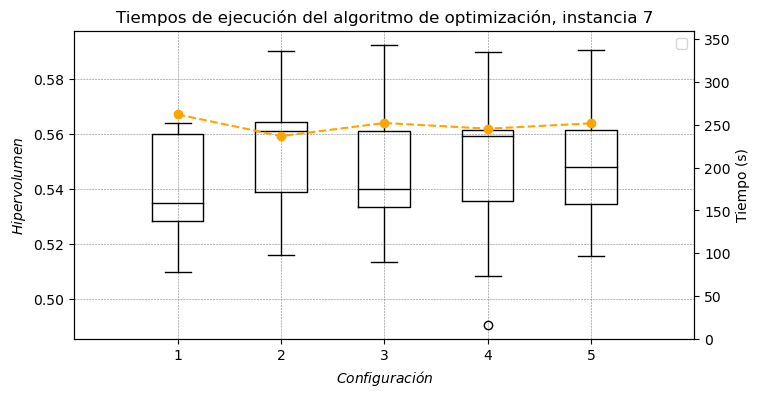

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))

# Coordenadas x para las barras
ind = len(testPerformance)

# Ancho de las barras
ancho_barra = 0.5

hipervolumenes = [testPerformance[i]['hv'] for i in range(ind)]
tiempos = [np.mean(testPerformance[i]['time']) for i in range(ind)]

ax.boxplot(hipervolumenes, widths=ancho_barra, showfliers=True, zorder = 3, medianprops=dict(color=(0,0,0,1)))

# Configuración de ejes y etiquetas
ax.set_xlabel('$Configuración$')
ax.set_ylabel('$Hipervolumen$')
ax.set_title('Tiempos de ejecución del algoritmo de optimización, instancia 7')
ax.set_xticklabels([f'{i+1}' for i in range(ind)])
ax.set_xlim([0,6])

# Leyenda para identificar los modelos
ax.legend()
ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)


# Crear un segundo conjunto de ejes para el eje y derecho
ax2 = ax.twinx()

# Graficar los datos en el eje y derecho
ax2.plot([i+1 for i in range(ind)], tiempos, '--', color='orange')  # 'b-' para una línea azul
ax2.scatter([i+1 for i in range(ind)],tiempos, color='orange', marker='o', zorder = 3)

# Configuración del eje y derecho
ax2.set_ylabel('Tiempo (s)')  # Color azul para el eje y derecho
ax2.set_ylim([0, 360])
